#IMPORTING SOME LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score

import warnings
warnings.filterwarnings('ignore')


#Load the Dataset

In [ ]:
df = pd.read_csv('/content/drugsComTest_raw.csv',nrows=500)

#Data cleaning and preprocessing

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
df.drop(['uniqueID','drugName','condition','date','usefulCount',],axis=1,inplace=True)

In [ ]:
df.head()

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",10
1,"""My son has Crohn&#039;s disease and has done ...",8
2,"""Quick reduction of symptoms""",9
3,"""Contrave combines drugs that were used for al...",9
4,"""I have been on this birth control for one cyc...",9


In [ ]:
df.shape

(500, 2)

In [ ]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Step: 1

#Convert to lower case:

This means that words like "Hello", "hello", and "HELLO" are treated as the same word, simplifying comparisons and matching operations

In [ ]:
import string

lower = [k.lower() for k in df['review']]
print(lower[0])

"i&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. my doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. thankfully i have had no side effects especially the most common - weight gain, i&#039;ve actually lost alot of weight. i still have suicidal thoughts but mirtazapine has saved me."


Step: 2
#tokenization:


The word_tokenize function from the NLTK (Natural Language Toolkit) library is commonly used for tokenizing text into words or word-like units.

In [ ]:
from nltk.tokenize import word_tokenize

token_lower = [word_tokenize(k) for k in lower]
print(token_lower[0])

['``', 'i', '&', '#', '039', ';', 've', 'tried', 'a', 'few', 'antidepressants', 'over', 'the', 'years', '(', 'citalopram', ',', 'fluoxetine', ',', 'amitriptyline', ')', ',', 'but', 'none', 'of', 'those', 'helped', 'with', 'my', 'depression', ',', 'insomnia', '&', 'amp', ';', 'anxiety', '.', 'my', 'doctor', 'suggested', 'and', 'changed', 'me', 'onto', '45mg', 'mirtazapine', 'and', 'this', 'medicine', 'has', 'saved', 'my', 'life', '.', 'thankfully', 'i', 'have', 'had', 'no', 'side', 'effects', 'especially', 'the', 'most', 'common', '-', 'weight', 'gain', ',', 'i', '&', '#', '039', ';', 've', 'actually', 'lost', 'alot', 'of', 'weight', '.', 'i', 'still', 'have', 'suicidal', 'thoughts', 'but', 'mirtazapine', 'has', 'saved', 'me', '.', "''"]


Step: 3
#Punctuation Removal
Removing punctuation involves stripping out characters like periods, commas, exclamation marks, question marks, and so on from a piece of writing.

In [ ]:
import re


regEx = re.compile('[%s]' %re.escape(string.punctuation))
#print(regEx)

punk_token_lower = []

for k in token_lower:
  review = []
  for j in k:
    x = regEx.sub(U'',j)
    #U'' is an empty Unicode string
    if not review == U'':
      review.append(x)
  punk_token_lower.append(review)

print(punk_token_lower[0])

['', 'i', '', '', '039', '', 've', 'tried', 'a', 'few', 'antidepressants', 'over', 'the', 'years', '', 'citalopram', '', 'fluoxetine', '', 'amitriptyline', '', '', 'but', 'none', 'of', 'those', 'helped', 'with', 'my', 'depression', '', 'insomnia', '', 'amp', '', 'anxiety', '', 'my', 'doctor', 'suggested', 'and', 'changed', 'me', 'onto', '45mg', 'mirtazapine', 'and', 'this', 'medicine', 'has', 'saved', 'my', 'life', '', 'thankfully', 'i', 'have', 'had', 'no', 'side', 'effects', 'especially', 'the', 'most', 'common', '', 'weight', 'gain', '', 'i', '', '', '039', '', 've', 'actually', 'lost', 'alot', 'of', 'weight', '', 'i', 'still', 'have', 'suicidal', 'thoughts', 'but', 'mirtazapine', 'has', 'saved', 'me', '', '']


step: 4
#Removing Stopwords:
Stopwords are commonly occurring words that are necessary for the structure of sentences but often don't contribute much to the overall meaning or context of the text and also Don't carry significant meaning

In [ ]:
from nltk.corpus import stopwords
#print(stopwords.words('english'))

stop_word = stopwords.words('english')
new_stopword = ['drug', 'medication', 'medicine', 'pharmaceutical', 'dosage', 'treatment',
    'prescription', 'patient', 'condition', 'symptom', 'disease', 'healthcare',
    'clinical', 'study', 'trial', 'use', 'including', 'may', 'also', 'however',
    'among', 'within', 'mg', 'mL', 'kg','would','shall','could','might']
stop_word.extend(new_stopword)
final_stop_word=set(stop_word)

stopword_punk_token_lower = []

for k in punk_token_lower:
  remove_stopword = []
  for j in k:
    if not j in final_stop_word:
      remove_stopword.append(j)
  stopword_punk_token_lower.append(remove_stopword)

print(stopword_punk_token_lower[0])

['', '', '', '039', '', 'tried', 'antidepressants', 'years', '', 'citalopram', '', 'fluoxetine', '', 'amitriptyline', '', '', 'none', 'helped', 'depression', '', 'insomnia', '', 'amp', '', 'anxiety', '', 'doctor', 'suggested', 'changed', 'onto', '45mg', 'mirtazapine', 'saved', 'life', '', 'thankfully', 'side', 'effects', 'especially', 'common', '', 'weight', 'gain', '', '', '', '039', '', 'actually', 'lost', 'alot', 'weight', '', 'still', 'suicidal', 'thoughts', 'mirtazapine', 'saved', '', '']


Step: 5
#Stemming and Lemmatization:

Stemming is core meaning of a word and lemmatization is identify the dictionary form of a word

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

stemLem_stopword_punk_token_lower = []

for k in stopword_punk_token_lower:
  stemLem =[]
  for j in k:
    #stemLem.append(porter.stem(j))
    stemLem.append(wordnet.lemmatize(j))
  stemLem_stopword_punk_token_lower.append(' '.join(stemLem))
print(stemLem_stopword_punk_token_lower[0])

   039  tried antidepressant year  citalopram  fluoxetine  amitriptyline   none helped depression  insomnia  amp  anxiety  doctor suggested changed onto 45mg mirtazapine saved life  thankfully side effect especially common  weight gain    039  actually lost alot weight  still suicidal thought mirtazapine saved  


In [ ]:
df['clean_text']= stemLem_stopword_punk_token_lower

To handle more complex text cleaning

In [ ]:

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove numeric digits
    text = re.sub(r'\b\d+\b', '', text)

    # Strip extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Define contraction mapping (add more as needed)
    contraction_mapping = {
        "ain't": "are not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mightn't": "might not",
        "might've": "might have",
        "mustn't": "must not",
        "must've": "must have",
        "needn't": "need not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "where'd": "where did",
        "where's": "where is",
        "who'll": "who will",
        "who's": "who is",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }



    return text





In [ ]:
df['clean_text'] = df['clean_text'].apply(clean_text)

In [ ]:
df.head()

,review,rating,clean_text
0,"""I&#039;ve tried a few antidepressants over th...",10,tried antidepressant year citalopram fluoxetin...
1,"""My son has Crohn&#039;s disease and has done ...",8,son crohn done well asacol complaint show side...
2,"""Quick reduction of symptoms""",9,quick reduction symptom
3,"""Contrave combines drugs that were used for al...",9,contrave combine drug used alcohol smoking opi...
4,"""I have been on this birth control for one cyc...",9,birth control one cycle reading review type si...


In [ ]:
df.drop(['review'],axis=1,inplace=True)

In [ ]:
df.head()

,rating,clean_text
0,10,tried antidepressant year citalopram fluoxetin...
1,8,son crohn done well asacol complaint show side...
2,9,quick reduction symptom
3,9,contrave combine drug used alcohol smoking opi...
4,9,birth control one cycle reading review type si...


#Exploratory Data Analysis

rating
10    158
9      79
1      68
8      52
3      30
7      28
5      25
2      24
4      18
6      18
Name: count, dtype: int64


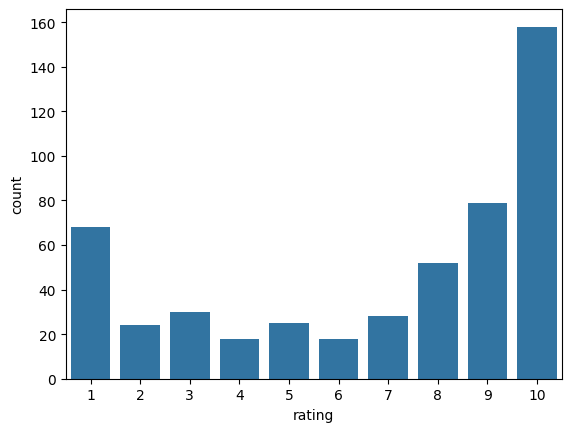

In [ ]:
#Rating
sns.countplot(x=df['rating'])
plt.show
print(df['rating'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

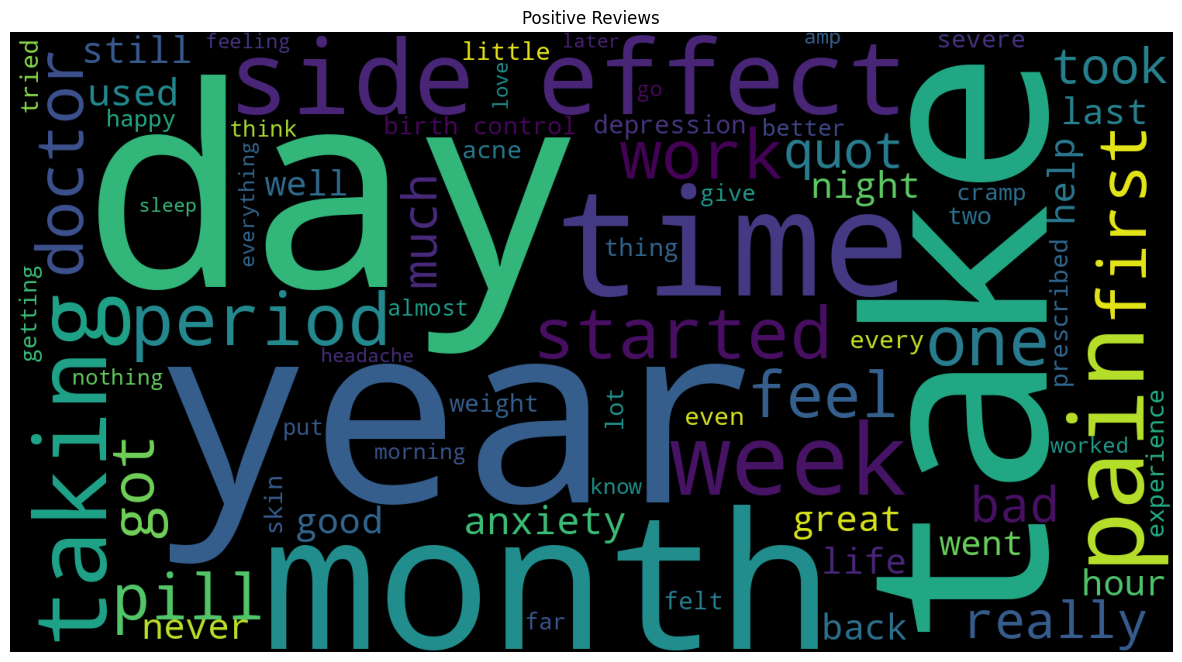

In [ ]:
#from wordcloud import WordCloud
sentences =df['clean_text']
pos =' '.join(map(str,sentences[df['rating']>=7]))
neg =' '.join(map(str,sentences[df['rating']<=4]))

pos_wordcloud = WordCloud(width=1500,height=800,min_font_size=25).generate(pos)

plt.figure(figsize=(15,15))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')



(-0.5, 1499.5, 799.5, -0.5)

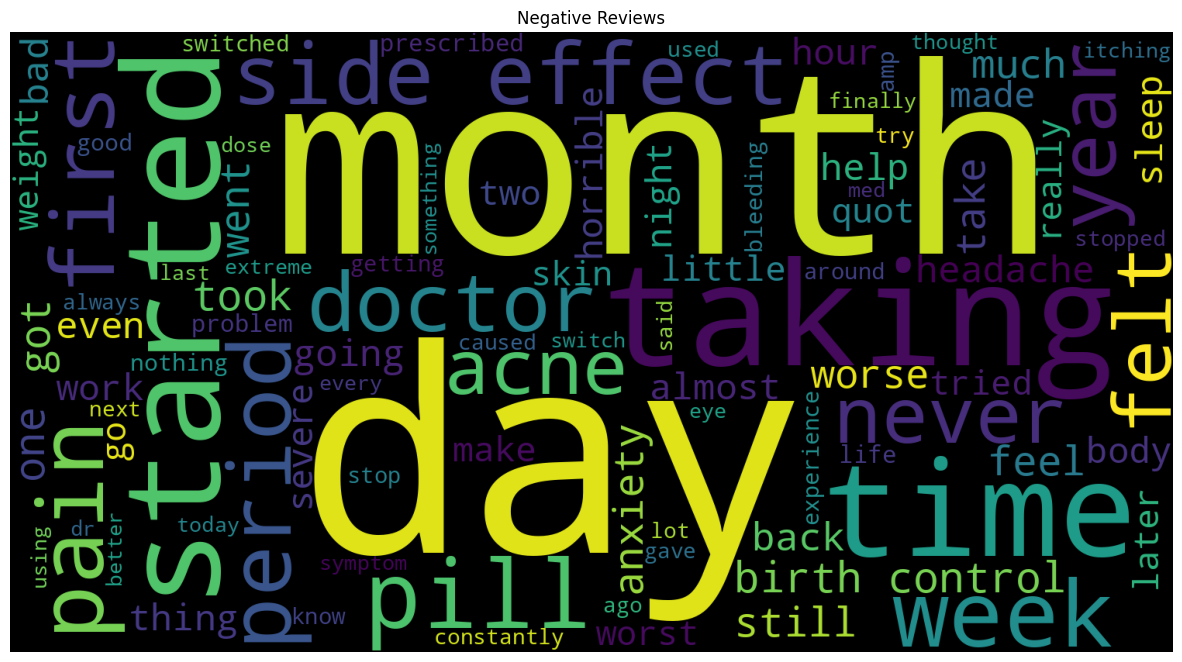

In [ ]:
neg_wordcloud = WordCloud(width=1500,height=800,min_font_size=25).generate(neg)

plt.figure(figsize=(15,15))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

#Get important feature by using Countvectorizer

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

def text_ngrams(reviews,n,g):
  cv = CountVectorizer(ngram_range=(g,g)) #g is ngrams number
  transfer = cv.fit_transform(reviews)
  sum_transfer = transfer.sum(axis=0)  # Sum the occurrences of each n-gram across all reviews
  word_frq =[(word,sum_transfer[0,idx]) for word, idx in cv.vocabulary_.items()] # Get the vocabulary (n-grams) and their frequencies
  word_frq_sorted =sorted(word_frq,key= lambda x: x[1],reverse =True)
  return word_frq_sorted[:n]



#Unigrams

In [ ]:
pos_unigram =text_ngrams(sentences[df['rating']>=7],20,1)
pos_unigram_dict =dict(pos_unigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(pos_unigram_dict.keys())
temp['count'] =list(pos_unigram_dict.values())


fig =px.bar(temp,x='count',y='common_word',title='Unigram Most common words in Positive reviews',width=700,height=700,color='common_word')
fig.show()

In [ ]:
neg_unigram =text_ngrams(sentences[df['rating']<=4],20,1)
neg_unigram_dict =dict(neg_unigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(neg_unigram_dict.keys())
temp['count'] =list(neg_unigram_dict.values())

fig =px.bar(temp,x='count',y='common_word',title='Unigram Most common words in Negative reviews',width=700,height=700,color='common_word')
fig.show()

#Bigrams

In [ ]:
pos_bigram =text_ngrams(sentences[df['rating']>=7],20,2)
pos_bigram_dict =dict(pos_bigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(pos_bigram_dict.keys())
temp['count'] =list(pos_bigram_dict.values())


fig =px.bar(temp,x='count',y='common_word',title='Bigram Most common words in Positive reviews',width=700,height=700,color='common_word')
fig.show()

In [ ]:
neg_bigram =text_ngrams(sentences[df['rating']<=4],20,2)
neg_bigram_dict =dict(neg_bigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(neg_bigram_dict.keys())
temp['count'] =list(neg_bigram_dict.values())

fig =px.bar(temp,x='count',y='common_word',title='Bigram Most common words in Negative reviews',width=700,height=700,color='common_word')
fig.show()

#Trigrams

In [ ]:
pos_trigram =text_ngrams(sentences[df['rating']>=7],20,3)
pos_trigram_dict =dict(pos_trigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(pos_trigram_dict.keys())
temp['count'] =list(pos_trigram_dict.values())


fig =px.bar(temp,x='count',y='common_word',title='Trigram Most common words in Positive reviews',width=700,height=700,color='common_word')
fig.show()

In [ ]:
neg_trigram =text_ngrams(sentences[df['rating']<=4],20,3)
neg_trigram_dict =dict(neg_trigram)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(neg_trigram_dict.keys())
temp['count'] =list(neg_trigram_dict.values())

fig =px.bar(temp,x='count',y='common_word',title='Trigram Most common words in Negative reviews',width=700,height=700,color='common_word')
fig.show()

We observed that the choice word 'like' is  used in trigram  both positive and negative cases... we can see actually the choice word positive or negative

In [ ]:
#import pandas as pd
pd.options.display.max_colwidth=1000   #show 1000 word per row

filtered_df = df.loc[(df['rating'] >= 7) & (df['clean_text'].str.contains('bad side effect'))]
filtered_df.head(10)


,rating,clean_text
349,10,immunodeficient need antibiotic often doctor try stay older generation antibiotic lot thing plus allergic lot levaquin prescribed acute issue like sinus infection work well never bad side effect feeling bit sort maybe upset stomach sick taking feel quot quot regardless unfortunately fairly expensive antibiotic last year worked quite well even
486,9,ortha evra amp xulane going year switched offbrand year ago never noticed difference complication bad side effect thing noticed quit taking period quits coming recently tried stop january period came month skipped february completely passed period date month got back hopefully regulate sure wan na stop taking try get pregnant tho


#Feature Engineering

In [ ]:
#Mapping rating data to Binary 1(+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral)
df['Label'] = df['rating'].apply(lambda x: '1' if x>=7 else ('0' if x<=4 else '2'))

In [ ]:
df.tail()

,rating,clean_text,Label
495,3,husband ra doctor sent indiana heart clinic ensure heart issue put november dr daly released tony saying heart issue started emprel january tony sizable aneurism aorta underwent heart surgery april due infection hour surgery redo done january died mother day infection saying good heart yet two month taking emprel odds recommend case,0
496,9,well start saying far good read comment scared start day feel great side effect since told doctor binge eat night advised take pill around pm clock came around desire look snack cup coffee started pack kid lunch touch snack something always gastric bypass starting weight got lowest great since lowest wore size saw doctor started gaining weight presently lb refuse gain back get write week good luck,1
497,9,effective fibromyalgia pain help fatigue,1
498,10,great,1
499,10,smoked forty year last pack day started chantix feb 1st kept smoking took month two cigs day quit march 3rd last cigarette one month side effect easy grandson got quit recommend tried everything patch hypnosis thing worked feel good saving dollar year thank chantix,1


Separate features and target coloms

In [ ]:
x = df['clean_text'].values
y = df['Label'].values

Splitting into train and test data

In [ ]:
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)  #Ensures that each class is adequately represented in both training and testing datasets

In [ ]:
x.shape,x_train.shape,x_test.shape

((500,), (400,), (100,))

Now converting the textual data to numerical data

In [ ]:
vec = TfidfVectorizer(ngram_range=(1,1)) #using countvectorizer ngram words

x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)          #only transform coz when predict a sentance is must be vec form


In [ ]:
#Convert Sparse Matrix to Dense Numpy Array

x_train_vec_array = x_train_vec.toarray()
x_test_vec_array = x_test_vec.toarray()


Training the Machine Learning Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(max_iter=1000)
model.fit(x_train_vec_array,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_test_pred =model.predict(x_test_vec_array)
y_train_pred =model.predict(x_train_vec_array)

#Model Evaluation

To check overfitting or underfitting in logistic regression model, you can use techniques such as model evaluation on training and testing accuracy

In [ ]:
#Accuracy_score (train part)

score = accuracy_score(y_train,y_train_pred)
print('train part accuracy : ',score)

train part accuracy :  0.85


In [ ]:
#Accuracy_score (test part)

score = accuracy_score(y_test,y_test_pred)
print('test part accuracy : ',score)

test part accuracy :  0.64


#Building a prediction system for evaluating

In [ ]:
x_test[30]


'ivf egg collection anxious reading sedation awake painful boy wrong min woke though best sleep world dream nada woke feeling amazing equivalent paracetamol whilst needed pain relief since procedure feel better felt long time think propaganda must really good anti anxiotic purpose sure hr past procedure still feel fab wonderful stuff'

In [ ]:
input =[x_test_vec_array[30]]
print(f'actual sentiment label :[{y_test[30]}]')

predicted_class =model.predict(input)
print('predicted sentiment label :',predicted_class)

actual sentiment label :[1]
predicted sentiment label : ['1']


#Saving the model

In [ ]:
import joblib as jb
jb.dump(model,'drugs_sentiment_apk')
chappie =jb.load('drugs_sentiment_apk')

#More Model Implementation

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
classifiers = {

               'SVC' : svc,
               'KN' : knc,
               'NB' : mnb,
               'DTC' : dtc,
               'LR' : lrc,
               'GNB' : gnb,
               'BNB' : bnb,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,
               'XGB' : xgb


}

In [ ]:

#here a value eror like expect 0 1 2 but get '0' '1' '2' so appling labelencoder.(ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['0' '1' '2'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
def train_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy



In [ ]:
accuracy_scores = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_array, y_train_encoded, x_test_vec_array, y_test_encoded)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores.append(accuracy)

For SVC
Accuracy -  0.64
For KN
Accuracy -  0.7
For NB
Accuracy -  0.63
For DTC
Accuracy -  0.59
For LR
Accuracy -  0.63
For GNB
Accuracy -  0.59
For BNB
Accuracy -  0.64
For RF
Accuracy -  0.64
For AdaBoost
Accuracy -  0.58
For BGC
Accuracy -  0.62
For ETC
Accuracy -  0.67
For GBDT
Accuracy -  0.59
For XGB
Accuracy -  0.6


In [ ]:
DataFrame = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores})
DataFrame = DataFrame.sort_values('Accuracy', ascending=False)

In [ ]:
DataFrame

,Algorithm,Accuracy
1,KN,0.70
10,ETC,0.67
0,SVC,0.64
6,BNB,0.64
7,RF,0.64
2,NB,0.63
4,LR,0.63
9,BGC,0.62
12,XGB,0.60
3,DTC,0.59


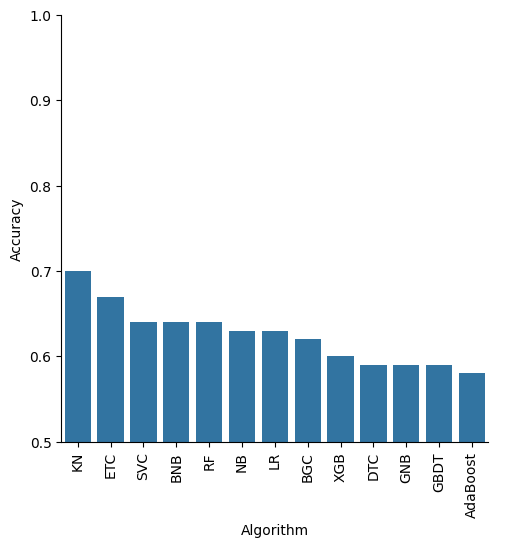

In [ ]:
sns.catplot(x='Algorithm',y='Accuracy',data=DataFrame,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()